In [1]:
import pymysql as pq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
connection=pq.connect('127.0.0.1','root','v24565812','kaggle-demo')

sql="select *from house_train"

hdata= pd.read_sql(sql, con=connection)
connection.close()

## 了解數據
理解問題:查看每一個變數並根據他們的意義和問題重要性進行解讀。  
單因素分析:只關注因變數(SalePrice)，並對其數據加以分析。  
多因素分析:分析因變數與各個自變數間的關係。  
數據清洗:整理數據並對缺失值、異常值及分類數據進行處理。

In [2]:
print(hdata.columns)
hdata.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


觀察各項變數後
選定影響力較高之變數對其分析  
Neighborhood 購房地點通常為重要選項  
OverallQual 房屋整體評價也為重要參考指標  
YearBuilt 屋齡也是買房的重要參考  
TotalBsmtSF & GrLivArea 房屋整體面積也是影響房價重要指標  
CentralAir 中央空調可納入參考  

## 單因素分析

In [3]:
#1.分析SalePrice
hdata.SalePrice.describe()

count      1121.000000
mean     185506.152542
std       82999.159004
min       35311.000000
25%      131000.000000
50%      164900.000000
75%      219500.000000
max      755000.000000
Name: SalePrice, dtype: float64

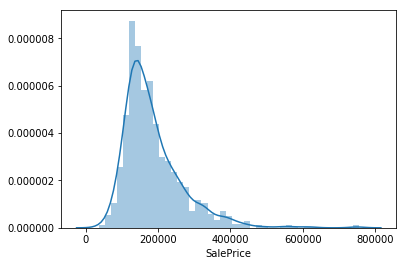

In [4]:
#觀察 saleprice分布圖
sns.distplot(hdata.SalePrice)

In [5]:
#峰度（Kurtosis）描述分布統緩程度
#偏度（Skewness）描述分布對稱程度
print("Skewness:" ,hdata['SalePrice'].skew())
print("Kurtosis:" ,hdata['SalePrice'].kurt())

Skewness: 1.9336150124067073
Kurtosis: 6.433445482663302


## 2.多因素分析

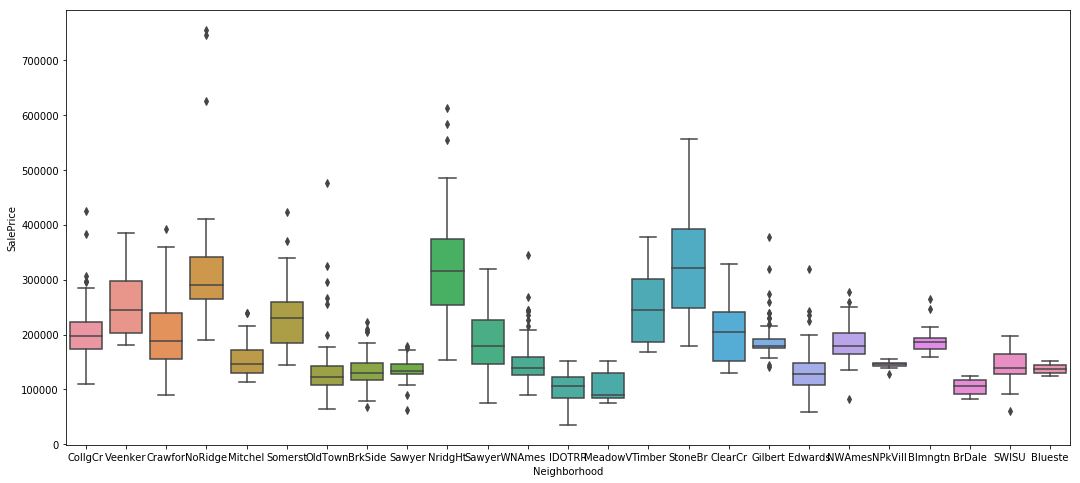

In [6]:
#分析Neighborhood(地段)有無是否影響 價格
fig,axa =plt.subplots(1,1,figsize=(18,8))
sns.boxplot(x=hdata.Neighborhood,y=hdata.SalePrice,data=hdata )
plt.show()

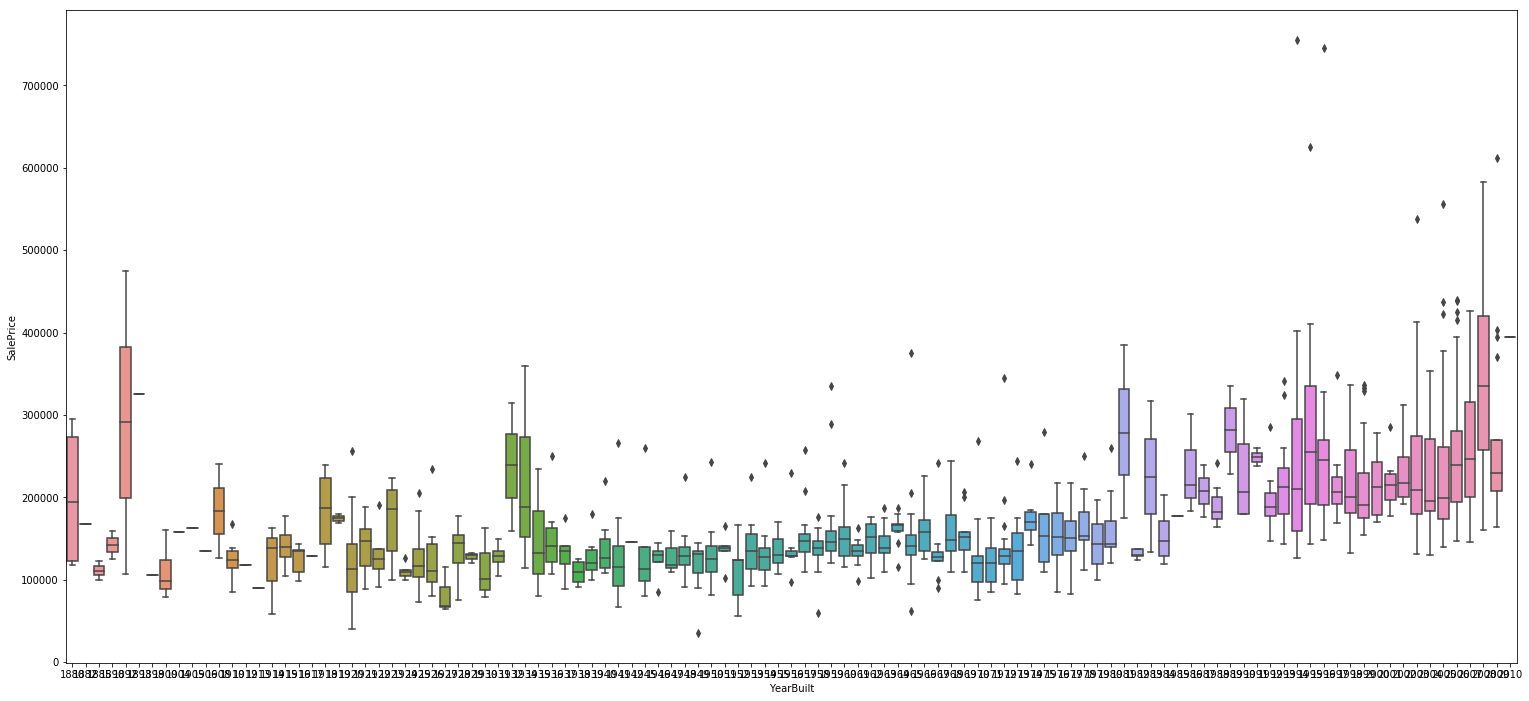

In [7]:
#分析YearBuilt與SalePrice關係
fig,axa =plt.subplots(1,1,figsize=(26,12))
sns.boxplot(x=hdata.YearBuilt,y=hdata.SalePrice,data=hdata )
plt.show()

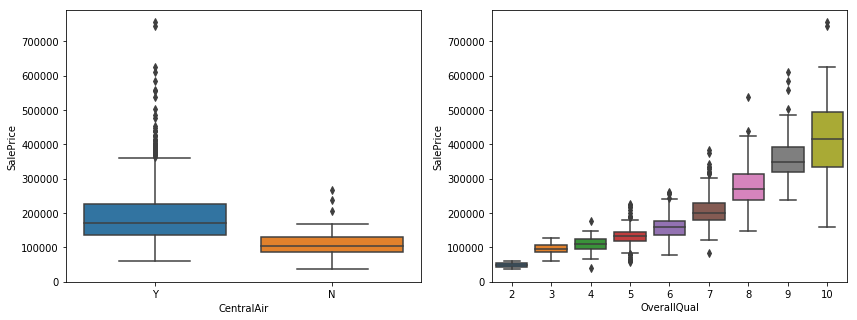

In [8]:
#分析CentralAir(中央空調)及OverallQual有無是否影響 價格
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x='CentralAir',y='SalePrice',data=hdata,ax=ax1 )
sns.boxplot(x='OverallQual',y='SalePrice',data=hdata,ax=ax2 )
plt.show()

可看出有中央空調價格較高  
而整體評價越高期價格也越高

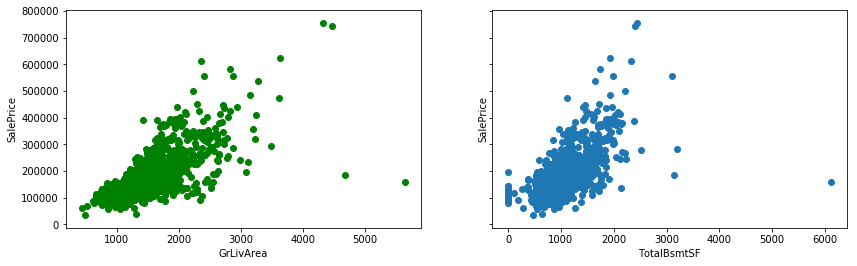

In [9]:
#Grlivare和TotalBsmtSF 與 SalePrice 散點圖

fig,(ax1,ax2) =plt.subplots(1,2,figsize=(14,4),sharey=True)
ax1.scatter(x=hdata.GrLivArea,y=hdata.SalePrice,c='g')
ax2.scatter(x=hdata.TotalBsmtSF,y=hdata.SalePrice)

ax1.set(xlabel='GrLivArea',ylabel='SalePrice')
ax2.set(xlabel='TotalBsmtSF',ylabel='SalePrice')
plt.show()

可以看出 SalePrice 和 GrLivAre與TotalBsmtSF關係皆很密切，呈現線性關係  
接下來再由相關分析來判斷  
由於CentralAir, Neighborhood皆非數值型  
因此透過sklearn將他們設為虛擬變數進行相關分析

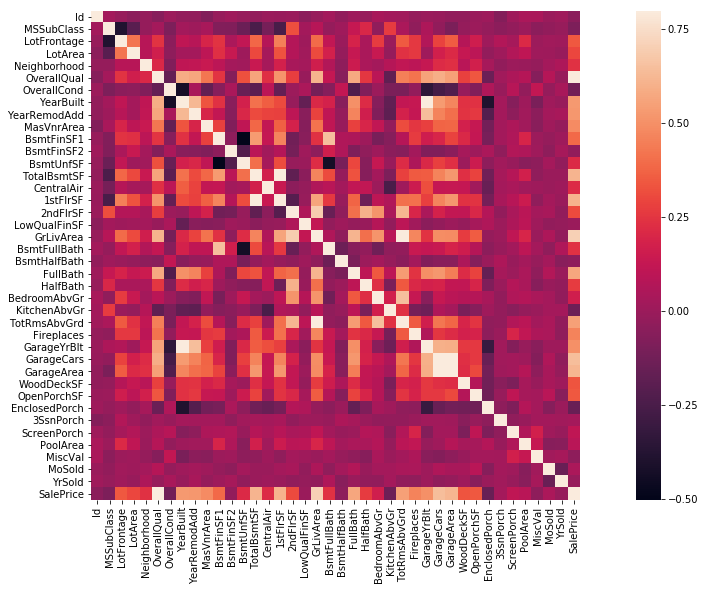

In [10]:
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    hdata[x] = label.fit_transform(hdata[x])
corrmat = hdata.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

從上圖可發現CentralAir,Neighborhood相關性不高因此後面不在考慮  
由於數量較多，我們從與SalePrice相關性較高挑選10個變數

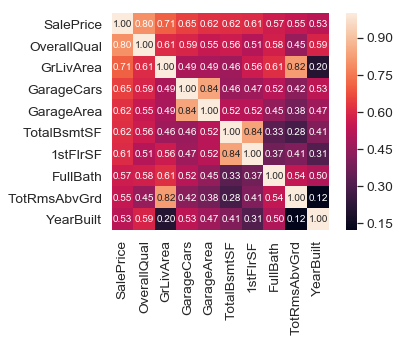

In [11]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(hdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

從上圖中可發現    
1.OverallQual、ToatlBsmtSF、GrLiveArea與SalePrice有高度相關性   
2.而GarageCars 和 GarageArea也是相關性較高的變量，但兩者屬性相同皆是車庫大小因此我們選擇GarageCars，因為它與 SalePrice 的相關性更高一些。  
3.TotalBsmtSF和 1stFloor與上述情況相同，我們選擇 TotalBsmtSF。    
4.TotRmsAbvGrd 和 GrLivArea也是，我們選擇GrLivArea  
5.YearBuilt 和 SalePrice相關性相對稍微低。  

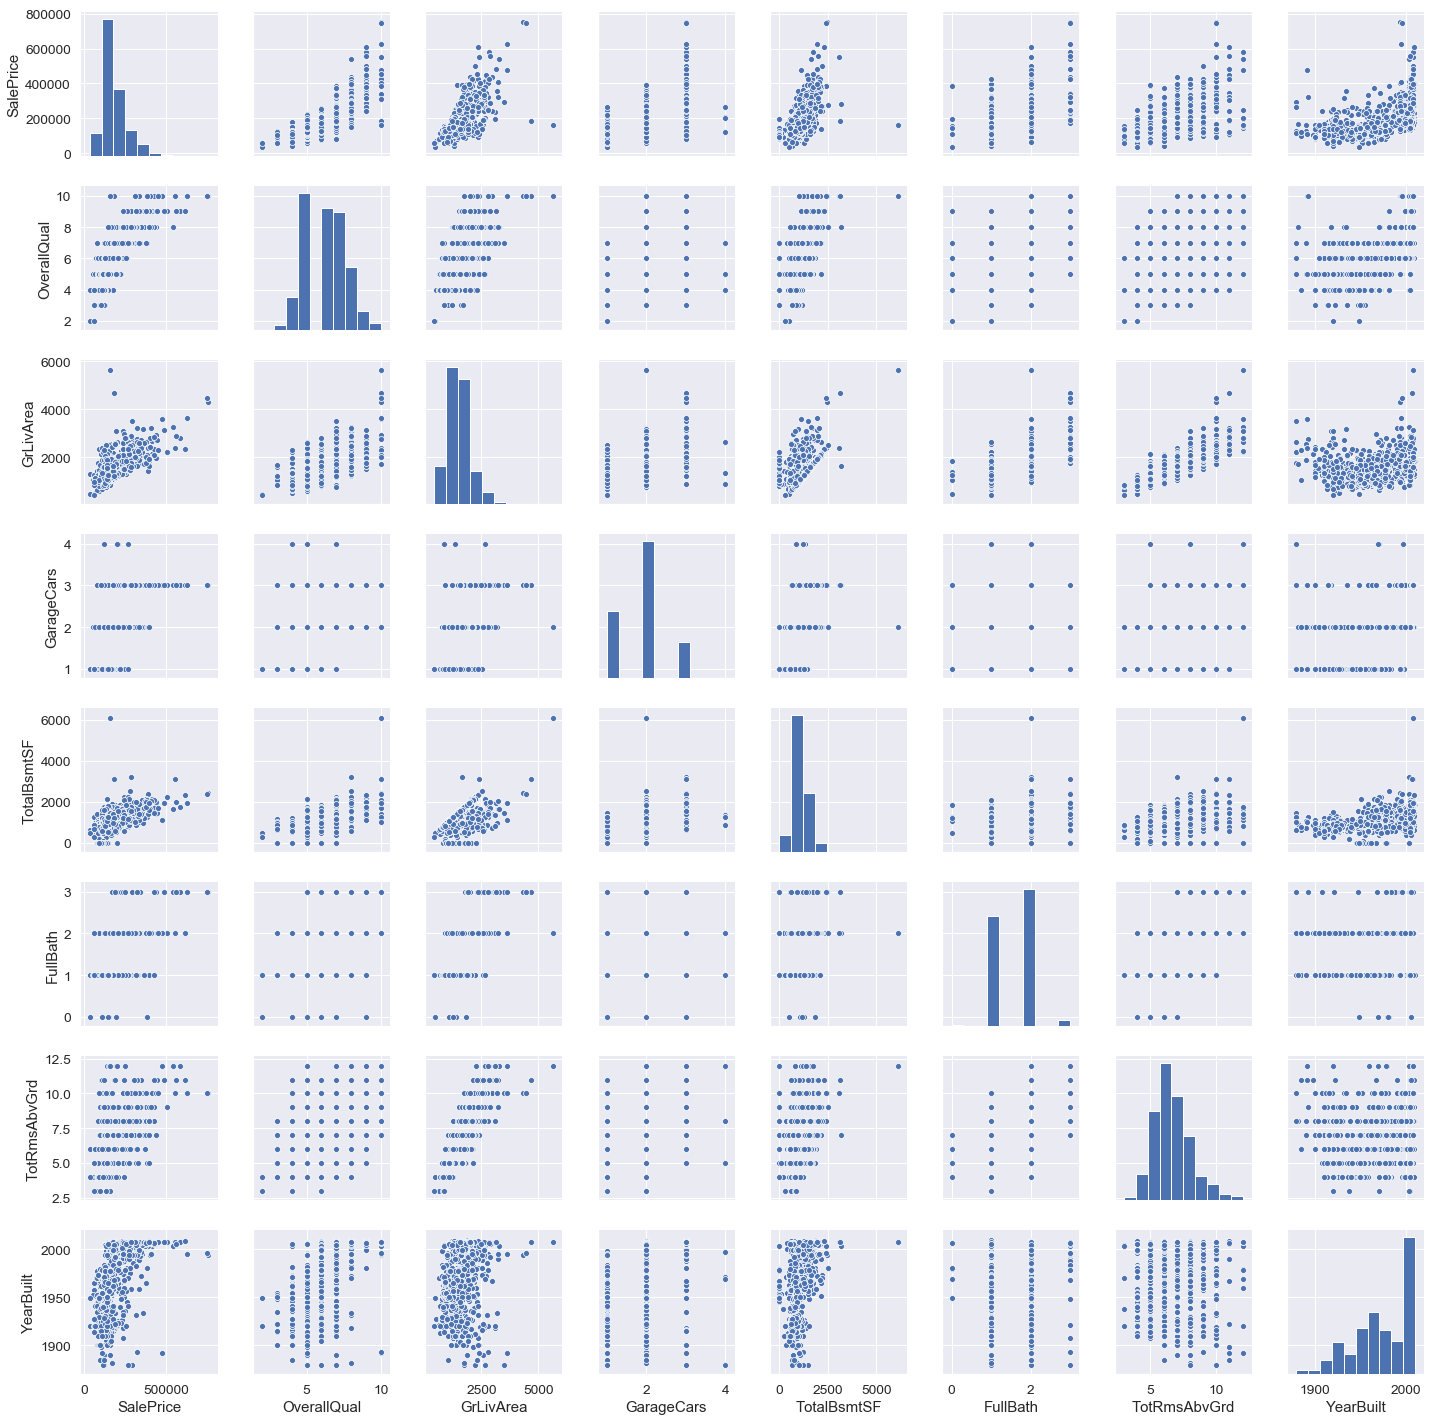

In [12]:
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(hdata[cols], size = 2.5)
plt.show()

In [13]:
#檢查是否有遺漏值
hdata[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 8 columns):
SalePrice       1121 non-null int64
OverallQual     1121 non-null int64
GrLivArea       1121 non-null int64
GarageCars      1121 non-null int64
TotalBsmtSF     1121 non-null int64
FullBath        1121 non-null int64
TotRmsAbvGrd    1121 non-null int64
YearBuilt       1121 non-null int64
dtypes: int64(8)
memory usage: 70.1 KB


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, svm, gaussian_process

cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = hdata[cols].values
y = hdata['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)



In [15]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge()
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm cost:-18.692985427384702
RandomForestRegressor cost:-8.863052350050449
BayesianRidge cost:-14.559912299999908
